In [1]:
from primitive import *
import matplotlib.pyplot as plt
from pycapacity.human import force_polytope
from pycapacity.visual import plot_polytope
from pycapacity.objects import Polytope
from pycapacity.algorithms import iterative_convex_hull_method

import numpy as np

def radius_grunbaum(n):
    """Radius of sphere An such that An = Proj(hypercube)"""
    if n > 300:
        ratio_gamma = (n/2)**(0-0.5)
    else:
        ratio_gamma = scipy.special.gamma(n/2)/scipy.special.gamma((n+1)/2)
    r_n = (n/np.sqrt(np.pi)) * ratio_gamma
    return r_n


In [2]:
p, n, m = 2, 3, 50
np.random.seed(59)

J = np.random.uniform(0, 10, size=(p,n))
N = np.random.uniform(-1, 10, size=(n, m))
t_min = 2*np.ones(m)
t_max = 10*np.ones(m)

P = force_polytope(J, N, t_min, t_max, tol=0.01)
center_pol = P.vertices.mean(axis=1)
print(center_pol)

P_in_torque = Polytope(vertices = J.T @ P.vertices)
# P_in_torque2 = Polytope(vertices = np.linalg.pinv(J.T) @ J.T @ P.vertices)


[101.12436608 209.91423466]


In [3]:
r_tensions = 0.5 * (t_max.mean()-t_min.mean())
u,s,vt = np.linalg.svd(N)
Np = u @ np.diag(s)
torque_bias = N @ (0.5*(t_max.mean()+t_min.mean()) * np.ones(m))
E_torque = radius_grunbaum(m) * r_tensions * Np @ Sphere(3) + torque_bias

Jt = HyperPlane(J.T)
Pol_ell = E_torque.inter(Jt)

Visual: no faces found, calculating faces
using provided 3d axis


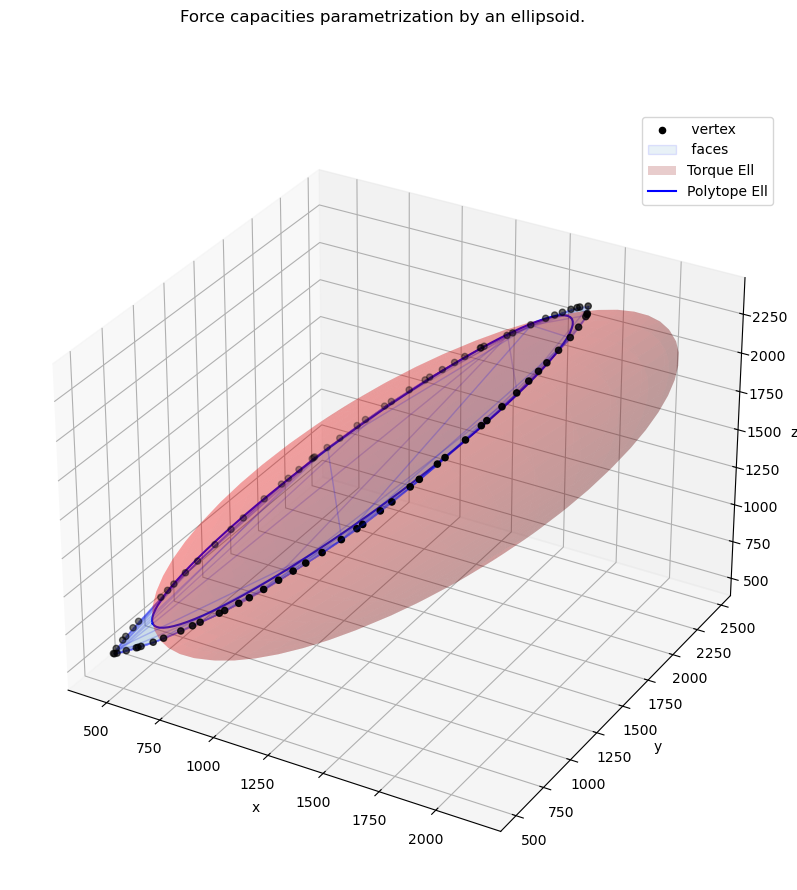

In [4]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")
fig.suptitle("Force capacities parametrization by an ellipsoid.")

plot_polytope(polytope=P_in_torque, plot=ax, edge_color="blue", alpha=0.1)
E_torque.plot(ax, color='red', alpha=0.2, label="Torque Ell")
Pol_ell.plot(ax, color="blue", alpha=1, label="Polytope Ell")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()

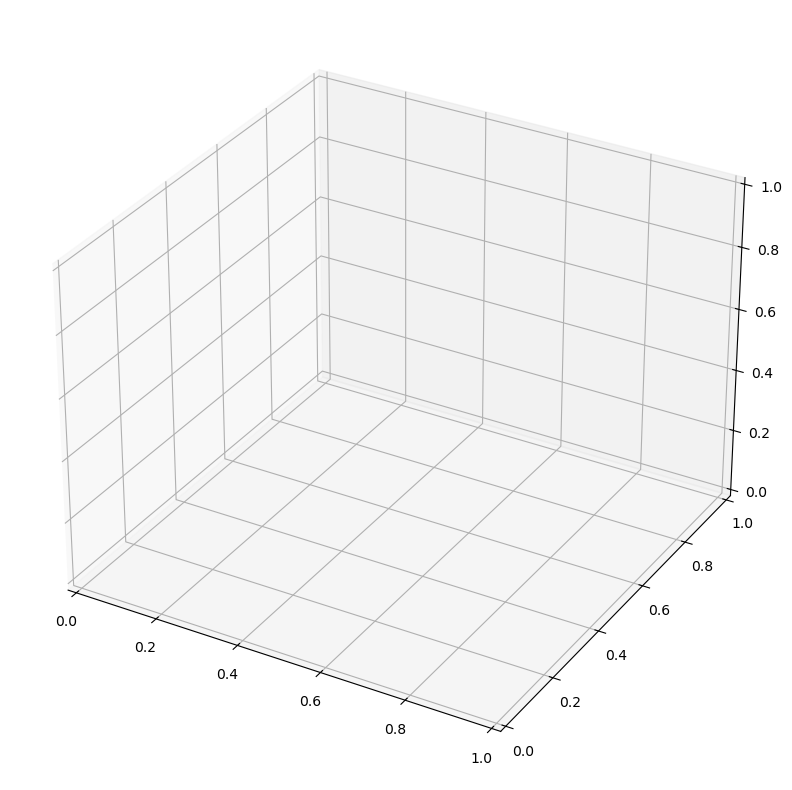

In [5]:
%matplotlib inline
p, n, m = 3,3,3
np.random.seed(23)
N = AffineSpace(np.random.uniform(-1,2,size=(n,m)))
A = AffineSpace(np.identity(p))

t_min = 0*np.ones(m)
t_max = 1*np.ones(m)
O = Orthotope.from_bounds(t_min, t_max)
# O.set_tolerance(0.01)


# P = force_polytope(A.matrix.T, N.matrix, t_min, t_max, tol=0.1)
# # P_in_A = np.linalg.pinv(A.T) @ P.vertices

# P2= Polytope(vertices=A.matrix @ P.vertices)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")

# plot_polytope(polytope=P2, plot=ax, edge_color="blue", alpha=0.1)


Orthotope(matrix=array([[3, 0, 0],
       [0, 2, 0],
       [0, 0, 2]]), location=array([[-0.5],
       [ 0. ],
       [ 0. ]]), tol=1)
<class 'primitive.Orthotope'>
1
[[-0.5]
 [ 0. ]
 [ 0. ]]
[-2. -1. -1.]
Visual: no faces found, calculating faces
using provided 3d axis
[-0.5 -0.5 -0.5] [-2. -1. -1.] [0.5 0.5 0.5] [1. 1. 1.]
Visual: no faces found, calculating faces
using provided 3d axis


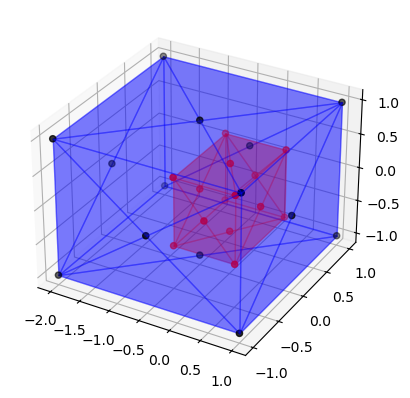

In [6]:
%matplotlib inline
m=3
Z = Orthotope.from_bounds([-2,-1,-1], [1,1,1])
print(Z)
print(type(Z))
print(Z.tol)
t_min, t_max = Z.bounds
print(Z.location)
print(t_min)
C = force_polytope(np.identity(m).T, np.identity(m), t_min, t_max, tol=0.1)
# plot_polytope(polytope=C, plot=plt, edge_color="blue", alpha=0.1)
Z.plot(alpha=0.3, face_color="blue", edge_color="blue")


C = Cube(m, tol=0.001)
b_min, b_max = C.bounds
print(b_min, t_min, b_max, t_max)
(C).plot(alpha=0.2, color="red", edge_color="red")

In [7]:
A = AffineSpace(np.random.uniform(size=(7,3)))
B = AffineSpace(np.random.uniform(size=(7,10)))
        # M = np.linalg.pinv(A).dot(B)

print((np.linalg.pinv(A.matrix) @ B.matrix).round(2))

P = A.projection_matrix
print((np.linalg.pinv(A.matrix) @ B.matrix).round(2))

# Ap = np.linalg.pinv(A.matrix)
# print((Ap @ A.project(B)).basis.round(2))

# print((P @ B.matrix).round(2))
# print((A.project(B)).matrix.round(2))
# # print(A.project(B.matrix).matrix.round(2))

[[ 0.32  0.6   0.53  0.31  0.08  0.35  0.44  0.13  0.12  0.76]
 [ 0.48 -0.    0.19  0.49  0.26 -0.22 -0.24  0.55  0.42 -0.25]
 [ 0.72  0.26  0.13  0.2   0.36  0.37  0.44  0.27  0.63  0.28]]
[[ 0.32  0.6   0.53  0.31  0.08  0.35  0.44  0.13  0.12  0.76]
 [ 0.48 -0.    0.19  0.49  0.26 -0.22 -0.24  0.55  0.42 -0.25]
 [ 0.72  0.26  0.13  0.2   0.36  0.37  0.44  0.27  0.63  0.28]]


In [11]:
# print((P @ B.basis).round(2))
Bp1 = AffineSpace(P@B.basis)
print(Bp1.basis.round(2))
Bp = AffineSpace(P@B.matrix)
print(Bp.basis.round(2))

Ap = np.linalg.pinv(A.matrix)
print((Ap @ B.matrix).round(2))
print((Ap @ A.project(B.matrix)).round(2))

# print(Bp1.matrix.round(2))
# print(Bp.matrix.round(2))

[[ 0.5   0.28 -0.37]
 [-0.04  0.22 -0.47]
 [-0.55 -0.33 -0.42]
 [ 0.5  -0.1  -0.36]
 [-0.37  0.25 -0.2 ]
 [-0.2   0.42 -0.41]
 [ 0.12 -0.72 -0.35]]
[[-0.37  0.19  0.54]
 [-0.47  0.22 -0.  ]
 [-0.42 -0.23 -0.6 ]
 [-0.36 -0.19  0.48]
 [-0.2   0.31 -0.32]
 [-0.41  0.45 -0.13]
 [-0.35 -0.73 -0.01]]
[[ 0.32  0.6   0.53  0.31  0.08  0.35  0.44  0.13  0.12  0.76]
 [ 0.48 -0.    0.19  0.49  0.26 -0.22 -0.24  0.55  0.42 -0.25]
 [ 0.72  0.26  0.13  0.2   0.36  0.37  0.44  0.27  0.63  0.28]]
[[ 0.32  0.6   0.53  0.31  0.08  0.35  0.44  0.13  0.12  0.76]
 [ 0.48 -0.    0.19  0.49  0.26 -0.22 -0.24  0.55  0.42 -0.25]
 [ 0.72  0.26  0.13  0.2   0.36  0.37  0.44  0.27  0.63  0.28]]


[-0.5 -0.5 -0.5]
Visual: no faces found, calculating faces
using provided 3d axis


<Axes3D: >

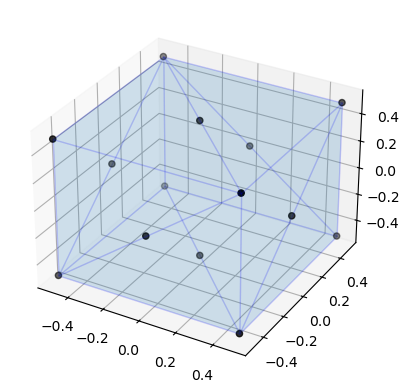

In [15]:
%matplotlib inline

t_min, t_max = Z.bounds
print(t_min)

plot_polytope(polytope=C, plot=plt, edge_color="blue", alpha=0.1)


[[ 1. -0. -0. -0.]
 [-0.  0. -0. -1.]
 [-0.  1. -0.  0.]
 [ 0. -0. -1. -0.]
 [ 0. -0.  1. -0.]
 [-0. -1. -0.  0.]
 [-0.  0. -0.  1.]
 [-1. -0.  0. -0.]]
[2.41579952 2.13840506 1.00134537]


Visual: no faces found, calculating faces
using provided 3d axis
Visual: no faces found, calculating faces
using provided 3d axis


<Axes3D: >

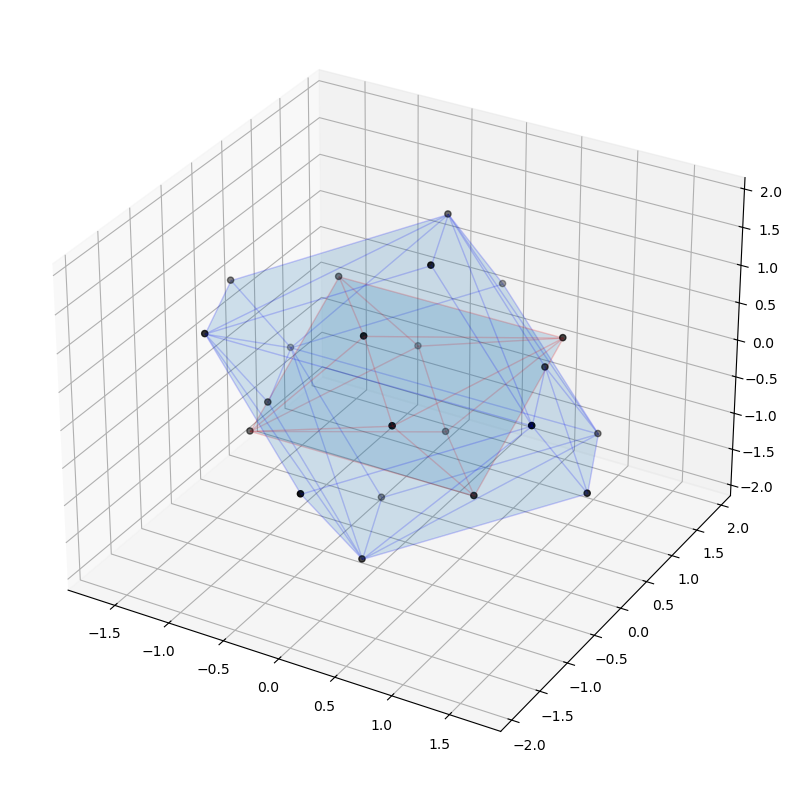

In [ ]:
%matplotlib inline
C = force_polytope(np.identity(m), np.identity(m), t_min, t_max, tol=0.001)
# print(C.H)

hull = ConvexHull(C.H)
cp_v = hull.points[hull.vertices]
CP = Polytope(vertices=C.H)
print(cp_v)
u,s,vt = N.svd
print(s)
s_ = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
])
ver = []
for x in cp_v:
    ver.append(s_@vt@x)
    # ver.append(N.matrix@x)
CP_proj = Polytope(vertices=np.sqrt(0.5**2 + 0.5**2)*2*np.array(ver).T)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")

P2 = force_polytope(np.identity(n), s_@vt, -np.ones(m), np.ones(m), tol=0.01)
plot_polytope(polytope=P2, plot=ax, edge_color="blue", alpha=0.1)
plot_polytope(polytope=CP_proj, plot=ax, edge_color="red", alpha=0.1)



In [ ]:

In = np.identity(3)
A = np.vstack([In, -In])
H = A * (1/2)
print(H)

[[ 0.5  0.   0. ]
 [ 0.   0.5  0. ]
 [ 0.   0.   0.5]
 [-0.5 -0.  -0. ]
 [-0.  -0.5 -0. ]
 [-0.  -0.  -0.5]]


In [ ]:
C = Cube(2)
# print(C.vertices)

for h in C.hyperplanes:
    print(h.dual.matrix,h.location.reshape(-1))
    # print(h.d)
    print()


[[-1.]
 [ 0.]] [1. 0.]

[[-1.]
 [ 0.]] [-1.  0.]

[[0.]
 [1.]] [0. 1.]

[[0.]
 [1.]] [ 0. -1.]



In [8]:
C.hyperplanes[0].normal

array([1., 0., 0.])

Visual: no faces found, calculating faces


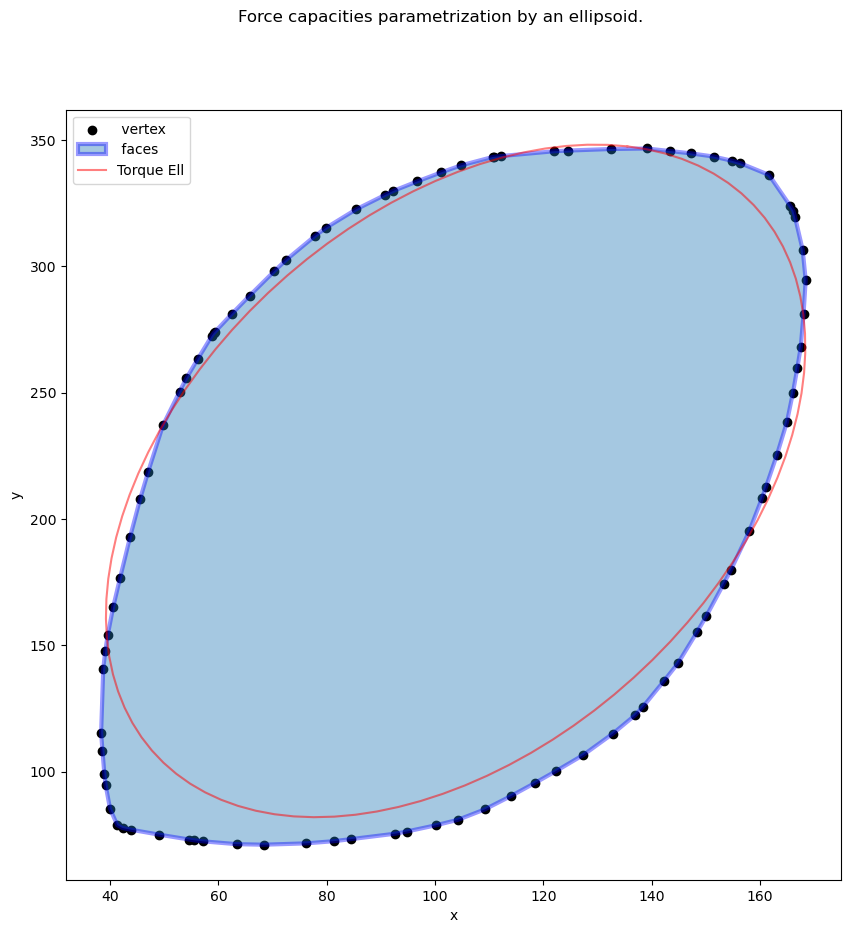

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
fig.suptitle("Force capacities parametrization by an ellipsoid.")

plot_polytope(polytope=P, plot=ax, edge_color="blue", alpha=0.1)
# plot_polytope(polytope=P_in_torque2, plot=ax, edge_color="green", alpha=0.1)
(np.linalg.pinv(J.T) @ Pol_ell).plot(ax, color='red', alpha=0.5, label="Torque Ell")
# Pol_ell.plot(ax, color="blue", alpha=1, label="Polytope Ell")

ax.set_xlabel("x")
ax.set_ylabel("y")
# ax.set_zlabel("z")
plt.legend()

In [ ]:

C = Cube(2)
v = C.compute_vertices(tol=0.01)
print(v)

[[-0.5 -0.5]
 [ 0.5 -0.5]
 [ 0.5  0.5]
 [-0.5  0.5]]


(array([-0.5, -0.5]), array([0.5, 0.5]))
[-0.5 -0.5]
[[1. 0.]
 [0. 1.]]
Visual: no faces found, calculating faces


<Axes: >

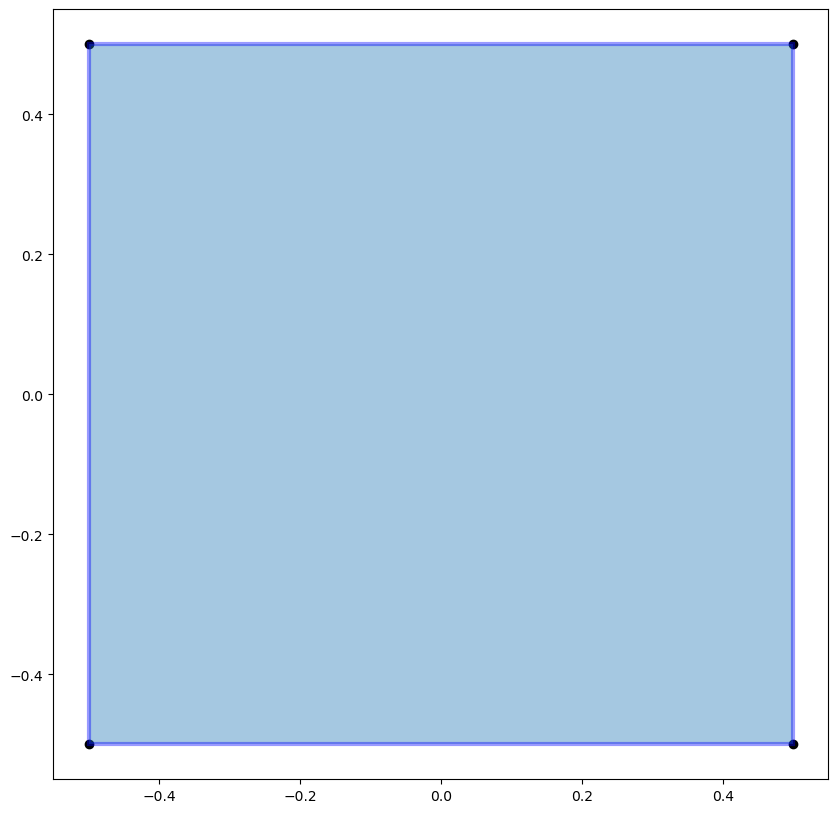

In [22]:
from scipy.spatial import ConvexHull
C = Cube(2)
np.array(list(itertools.product((1, -1), repeat=C.dim))).T + C.location

print(C.bounds)

bounds_min, bounds_max = C.bounds
print(bounds_min)
print(C.matrix)
P = force_polytope(np.identity(C.dim),C.matrix, bounds_min, bounds_max, tol=0.01)
hull = ConvexHull(P.vertices.T)
vertices = hull.points[hull.vertices]
P = Polytope(vertices=vertices.T)
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

plot_polytope(polytope=P, plot=ax, edge_color="blue", alpha=0.1)

Test 4D 

In [8]:
p, n, m = 3, 7, 100
np.random.seed(60)

J = np.random.uniform(0, 10, size=(p,n))
N = np.random.uniform(-11, 11, size=(n, m))
t_min = 0*np.ones(m)
t_max = 10*np.ones(m)

P = force_polytope(J, N, t_min, t_max, tol=0.1)
center_pol = P.vertices.mean(axis=1)
print(center_pol)

[-69.9043629   43.33400259 -18.37705653]


Visual: no faces found, calculating faces
using provided 3d axis


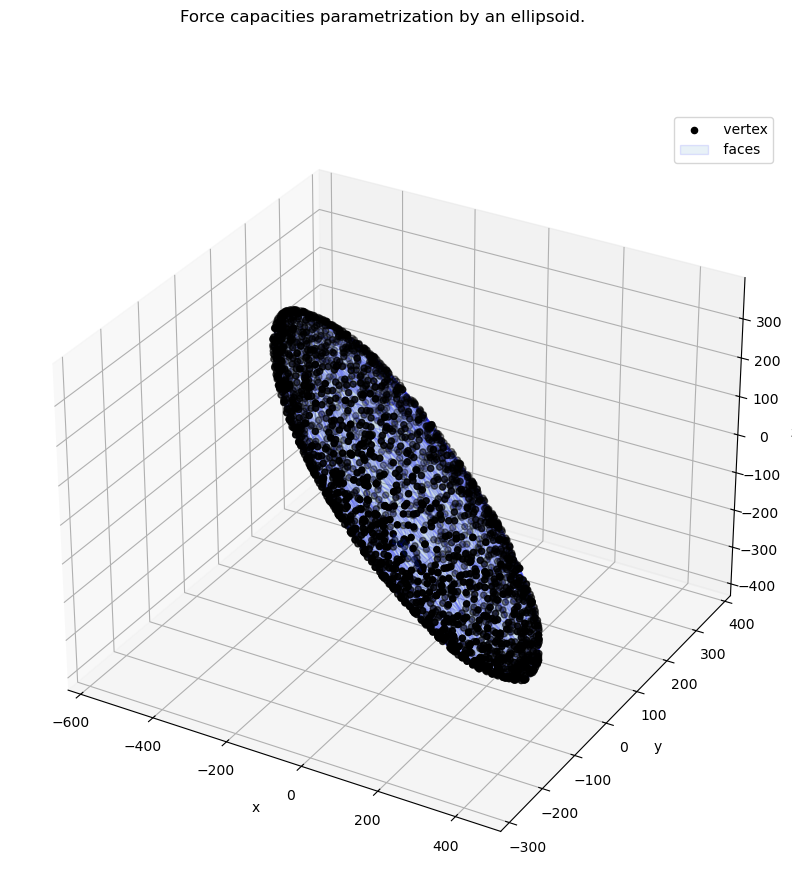

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")
fig.suptitle("Force capacities parametrization by an ellipsoid.")

plot_polytope(polytope=P, plot=ax, edge_color="blue", alpha=0.1)
# E_torque.plot(ax, color='red', alpha=0.1, label="Torque Ell")
# Pol_ell.plot(ax, color="blue", alpha=1, label="Polytope Ell")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()

In [10]:
r_tensions = 0.5 * (t_max.mean()-t_min.mean())
u,s,vt = np.linalg.svd(N)
Np = u @ np.diag(s)
torque_bias = N @ (0.5*(t_max.mean()+t_min.mean()) * np.ones(m))
E_torque = radius_grunbaum(m) * r_tensions * Np @ Sphere(n) + torque_bias

Jt = AffineSpace(J.T)
Ef = np.linalg.pinv(J.T) @ E_torque.inter(Jt)

using provided 3d axis


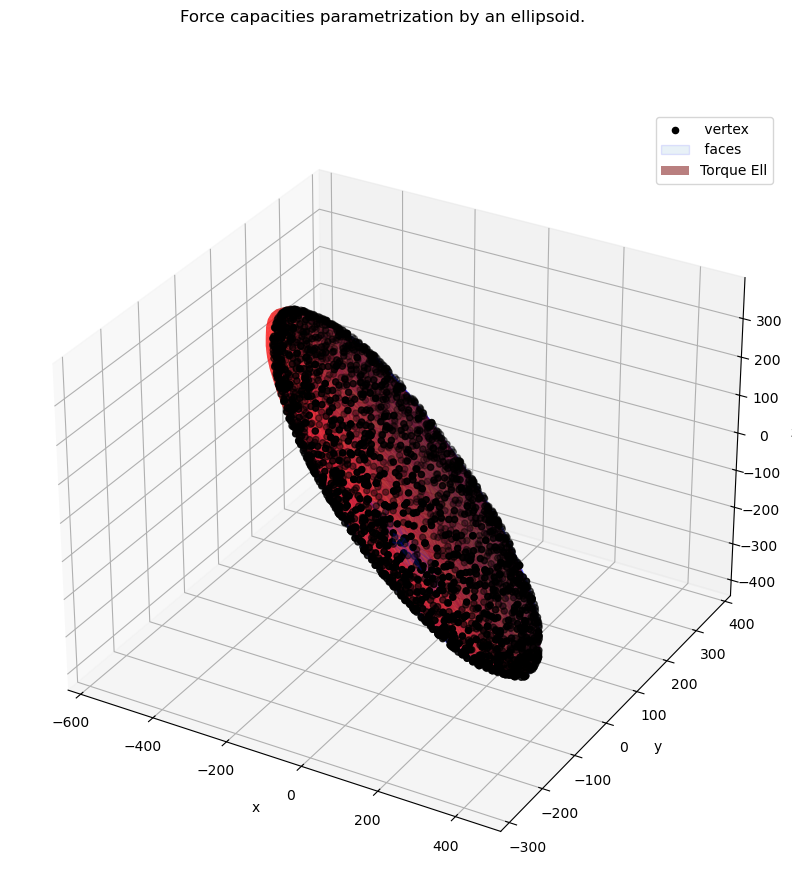

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")
fig.suptitle("Force capacities parametrization by an ellipsoid.")

plot_polytope(polytope=P, plot=ax, edge_color="blue", alpha=0.1)
Ef.plot(ax, color='red', alpha=0.5, label="Torque Ell")
# Pol_ell.plot(ax, color="blue", alpha=1, label="Polytope Ell")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()

In [10]:
%matplotlib qt5
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection="3d")
fig.suptitle("Force capacities parametrization by an ellipsoid.")

plot_polytope(polytope=P, plot=ax, edge_color="blue", alpha=0.1)
Ef.plot(ax, color='red', alpha=0.5, label="Torque Ell")
# Pol_ell.plot(ax, color="blue", alpha=1, label="Polytope Ell")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()

using provided 3d axis


In [13]:
K = Sphere(2, radius=30)
print(K.dim)
print(K.radius)


2
30
